In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() #Ne pas télécharger à chaque fois, c'est LONG !

170500096/170498071 [==============================] - 263s 2us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


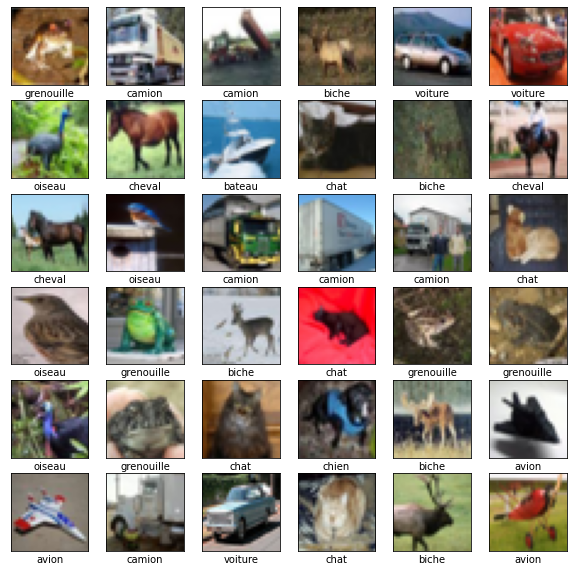

In [86]:
fig = plt.figure(figsize=(10, 10))

class_names = ['avion', 'voiture', 'oiseau', 'chat', 'biche',
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.savefig("cifar10.jpg")
plt.show()


In [38]:
#On normalise & onehot encoding
x_train, x_test = x_train / 255.0, x_test / 255.0
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)


In [58]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [87]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_19 (Dense)             (None, 10)              

In [61]:
history1=model1.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test))

Epoch 1/20
1563/1563 [==============================] - 47s 29ms/step - loss: 1.7160 - accuracy: 0.3725 - val_loss: 1.3167 - val_accuracy: 0.5297
Epoch 2/20
1563/1563 [==============================] - 46s 30ms/step - loss: 1.2419 - accuracy: 0.5598 - val_loss: 1.1732 - val_accuracy: 0.5865
Epoch 3/20
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0683 - accuracy: 0.6286 - val_loss: 1.0676 - val_accuracy: 0.6273
Epoch 4/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9538 - accuracy: 0.6675 - val_loss: 1.0269 - val_accuracy: 0.6391
Epoch 5/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8659 - accuracy: 0.6949 - val_loss: 1.0745 - val_accuracy: 0.6275
Epoch 6/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7956 - accuracy: 0.7237 - val_loss: 0.9879 - val_accuracy: 0.6658
Epoch 7/20
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7357 - accuracy: 0.7419 - val_loss: 1.0227 -

In [64]:
evaluation = model1.evaluate(x_test, y_cat_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 1.8158 - accuracy: 0.6436
Test Accuracy: 0.6435999870300293


<AxesSubplot:>

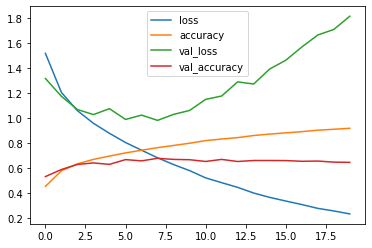

In [94]:
pd.DataFrame(history1.history).plot()

In [68]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) 
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history2=model2.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test))

Epoch 1/20
1563/1563 [==============================] - 51s 28ms/step - loss: 1.7505 - accuracy: 0.3528 - val_loss: 1.3225 - val_accuracy: 0.5213
Epoch 2/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2930 - accuracy: 0.5394 - val_loss: 1.1666 - val_accuracy: 0.5928
Epoch 3/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1699 - accuracy: 0.5886 - val_loss: 1.0903 - val_accuracy: 0.6129
Epoch 4/20
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0620 - accuracy: 0.6308 - val_loss: 1.0009 - val_accuracy: 0.6523
Epoch 5/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9730 - accuracy: 0.6530 - val_loss: 0.9524 - val_accuracy: 0.6682
Epoch 6/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9102 - accuracy: 0.6829 - val_loss: 0.9026 - val_accuracy: 0.6898
Epoch 7/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8625 - accuracy: 0.7022 - val_loss: 0.9002 -

In [88]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)             

In [69]:
evaluation = model2.evaluate(x_test, y_cat_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.9165 - accuracy: 0.7047
Test Accuracy: 0.7046999931335449


<AxesSubplot:>

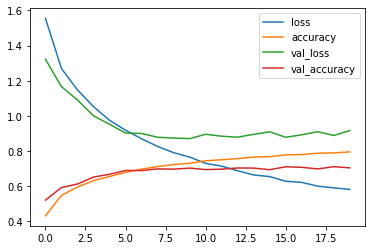

In [70]:
pd.DataFrame(history2.history).plot()

In [73]:
model3 = Sequential()
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history3=model3.fit(x_train, y_cat_train,epochs=50,validation_data=(x_test, y_cat_test)) 

Epoch 1/50
1563/1563 [==============================] - 362s 230ms/step - loss: 1.7709 - accuracy: 0.3381 - val_loss: 1.2155 - val_accuracy: 0.5690
Epoch 2/50
1563/1563 [==============================] - 384s 246ms/step - loss: 1.2391 - accuracy: 0.5539 - val_loss: 1.0587 - val_accuracy: 0.6274
Epoch 3/50
1563/1563 [==============================] - 384s 245ms/step - loss: 1.0589 - accuracy: 0.6232 - val_loss: 0.9312 - val_accuracy: 0.6772
Epoch 4/50
1563/1563 [==============================] - 351s 225ms/step - loss: 0.9329 - accuracy: 0.6702 - val_loss: 0.9155 - val_accuracy: 0.6832
Epoch 5/50
1563/1563 [==============================] - 360s 230ms/step - loss: 0.8499 - accuracy: 0.7027 - val_loss: 0.8211 - val_accuracy: 0.7220
Epoch 6/50
1563/1563 [==============================] - 362s 231ms/step - loss: 0.7836 - accuracy: 0.7219 - val_loss: 0.7751 - val_accuracy: 0.7296
Epoch 7/50
1563/1563 [==============================] - 363s 232ms/step - loss: 0.7363 - accuracy: 0.7400 - val_

In [89]:
model3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 128)       

<AxesSubplot:>

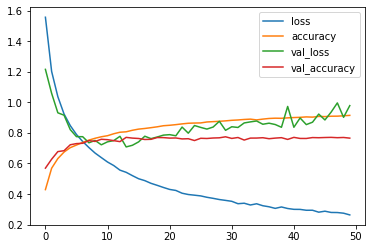

In [74]:
pd.DataFrame(history3.history).plot()

In [75]:
evaluation = model3.evaluate(x_test, y_cat_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 13s 43ms/step - loss: 0.9783 - accuracy: 0.7654
Test Accuracy: 0.7653999924659729


In [80]:
model5 = Sequential()
model5.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model5.add(BatchNormalization())
model5.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))
model5.add(Dropout(0.4))

model5.add(BatchNormalization())
model5.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model5.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))
model5.add(Dropout(0.4))

model5.add(Flatten())

model5.add(Dense(units = 1024, activation = 'relu'))

model5.add(Dense(units = 1024, activation = 'relu'))

model5.add(Dense(units = 10, activation = 'softmax'))
model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history5=model5.fit(x_train, y_cat_train,epochs=50,validation_data=(x_test, y_cat_test))

NameError: name 'y_train_cat' is not defined

In [90]:
model5.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)      

<AxesSubplot:>

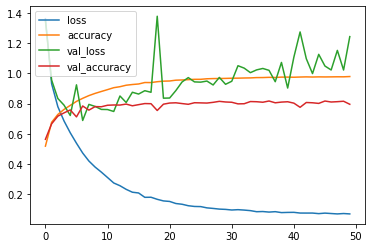

In [95]:
pd.DataFrame(history5.history).plot()

In [79]:
evaluation = model5.evaluate(x_test, y_cat_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 15s 48ms/step - loss: 1.2436 - accuracy: 0.7958
Test Accuracy: 0.795799970626831


In [82]:
final_model = Sequential()
final_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
final_model.add(BatchNormalization())
final_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
final_model.add(BatchNormalization())
final_model.add(MaxPool2D((2, 2)))
final_model.add(Dropout(0.2))
final_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
final_model.add(BatchNormalization())
final_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
final_model.add(BatchNormalization())
final_model.add(MaxPool2D((2, 2)))
final_model.add(Dropout(0.3))
final_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
final_model.add(BatchNormalization())
final_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
final_model.add(BatchNormalization())
final_model.add(MaxPool2D((2, 2)))
final_model.add(Dropout(0.4))
final_model.add(Flatten())
final_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.5))
final_model.add(Dense(10, activation='softmax'))

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=final_model.fit(x_train,y_cat_train,epochs=50,validation_data=(x_test,y_cat_test))

Epoch 1/50
1563/1563 [==============================] - 385s 229ms/step - loss: 1.9722 - accuracy: 0.3608 - val_loss: 1.0927 - val_accuracy: 0.6090
Epoch 2/50
1563/1563 [==============================] - 367s 235ms/step - loss: 1.1388 - accuracy: 0.5966 - val_loss: 1.3468 - val_accuracy: 0.5921
Epoch 3/50
1563/1563 [==============================] - 360s 231ms/step - loss: 0.9247 - accuracy: 0.6779 - val_loss: 0.7288 - val_accuracy: 0.7426
Epoch 4/50
1563/1563 [==============================] - 334s 214ms/step - loss: 0.8042 - accuracy: 0.7198 - val_loss: 0.7344 - val_accuracy: 0.7521
Epoch 5/50
1563/1563 [==============================] - 372s 238ms/step - loss: 0.7326 - accuracy: 0.7506 - val_loss: 0.7221 - val_accuracy: 0.7533
Epoch 6/50
1563/1563 [==============================] - 374s 239ms/step - loss: 0.6779 - accuracy: 0.7665 - val_loss: 0.5782 - val_accuracy: 0.8027
Epoch 7/50
1563/1563 [==============================] - 338s 216ms/step - loss: 0.6122 - accuracy: 0.7924 - val_

In [91]:
final_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 64)      

In [83]:
evaluation = final_model.evaluate(x_test, y_cat_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 12s 37ms/step - loss: 0.4504 - accuracy: 0.8695
Test Accuracy: 0.8694999814033508


<AxesSubplot:>

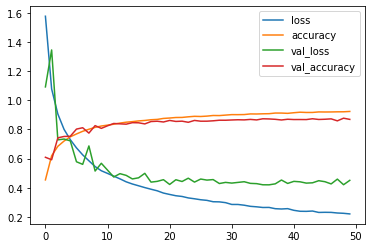

In [84]:
pd.DataFrame(history.history).plot()